Importing packages for Data Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
os.chdir('Species List')
path = os.getcwd()
files = os.listdir(path)
files

['NPSpecies_FullListWithDetails_CANY_20210113085217.xlsx',
 'NPSpecies_FullListWithDetails_BRCA_20210115102734.xlsx',
 'NPSpecies_FullListWithDetails_BADL_20210113085134.xlsx',
 'NPSpecies_FullListWithDetails_BIBE_20210113085151.xlsx',
 'NPSpecies_FullListWithDetails_ZION_20210113090237.xlsx',
 'NPSpecies_FullListWithDetails_YOSE_20210113090229.xlsx',
 'NPSpecies_FullListWithDetails_GLAC_20210113085435.xlsx',
 'NPSpecies_FullListWithDetails_ACAD_20210113085021.xlsx',
 'NPSpecies_FullListWithDetails_WHSA_20210113090145.xlsx',
 'NPSpecies_FullListWithDetails_SHEN_20210113090038.xlsx',
 'NPSpecies_FullListWithDetails_CAVE_20210113085238.xlsx',
 'NPSpecies_FullListWithDetails_CARE_20210113085228.xlsx',
 'NPSpecies_FullListWithDetails_ISRO_20210113085705.xlsx',
 'NPSpecies_FullListWithDetails_KOVA_20210113085757.xlsx',
 'NPSpecies_FullListWithDetails_DENA_20210113085338.xlsx',
 'NPSpecies_FullListWithDetails_EVER_20210113085400.xlsx',
 'NPSpecies_FullListWithDetails_MEVE_20210113085834.xlsx

In [3]:
df = pd.DataFrame()
for f in files:
    """Loop to read all raw data files and append to singular Data Frame"""
    data = pd.read_excel(f, 'Sheet1')
    df = df.append(data, ignore_index = True)

In [4]:
df.columns.tolist()

['Region',
 'Park Code',
 'Park Name',
 'Category',
 'Category Sort',
 'Order',
 'Family',
 'Taxon Code',
 'TSN',
 'Taxon Record Status',
 'Scientific Name',
 'Common Names',
 'Synonyms',
 'Park Accepted',
 'Sens?',
 'Record Status',
 'Occurrence',
 'Occurrence Tags',
 'Nativeness',
 'Nativeness Tags',
 'Abundance',
 'NPS Tags',
 'Park Tags',
 'Internal Park Tags',
 'References',
 'Observations',
 'Vouchers',
 'ExternalLinks',
 'T&E',
 'State Status',
 'Ozone',
 'GRank',
 'SRank']

In [5]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by = 'count')

,count,%
Taxon Record Status,0,0.000000
Park Code,0,0.000000
Park Name,0,0.000000
Category,0,0.000000
Category Sort,0,0.000000
Taxon Code,0,0.000000
Record Status,0,0.000000
Scientific Name,0,0.000000
Sens?,0,0.000000
Park Accepted,0,0.000000


Columns to Drop - Reason: Region and Internal Park Tags (missing 100% of values), External Links, Nativeness Tags, Ozone, Occurence Tags, Park Tags (state specific identifiers), Synonyms, Vouchers, References(not relevant to analysis)

In [6]:
to_drop = ['Region', 'Internal Park Tags', 'ExternalLinks', 'Nativeness Tags', 'Ozone', 'Occurrence Tags', 'Park Tags', 'Synonyms', 'Vouchers', 'References']
df.drop(to_drop, inplace= True, axis = 1)

In [7]:
df.select_dtypes('object')

,Park Code,Park Name,Category,Order,Family,Taxon Record Status,Scientific Name,Common Names,Park Accepted,Sens?,Record Status,Occurrence,Nativeness,Abundance,NPS Tags,T&E,State Status,GRank,SRank
0,CANY,Canyonlands National Park,Mammal,Artiodactyla,Antilocapridae,Active,Antilocapra americana,Pronghorn,Accepted,No,Approved,Unconfirmed,Native,NaN,NaN,NaN,NaN,G5,UT: S4
1,CANY,Canyonlands National Park,Mammal,Artiodactyla,Bovidae,Active,Ovis canadensis,Bighorn Sheep,Accepted,No,Approved,Present,Native,Uncommon,Breeder,SC,NaN,G4,UT: S3?
2,CANY,Canyonlands National Park,Mammal,Artiodactyla,Cervidae,Inactive,Cervus canadensis,Elk,Accepted,No,Approved,Present,Native,Unknown,Migratory,NaN,NaN,NaN,NaN
3,CANY,Canyonlands National Park,Mammal,Artiodactyla,Cervidae,Active,Odocoileus hemionus,Mule Deer,Accepted,No,Approved,Present,Native,Uncommon,Breeder,NaN,NaN,G5,UT: S5
4,CANY,Canyonlands National Park,Mammal,Carnivora,Canidae,Active,Canis latrans,Coyote,Accepted,No,Approved,Present,Native,Uncommon,Breeder,SC,NaN,G5,UT: S5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99321,CONG,Congaree National Park,Crab/Lobster/Shrimp,Decapoda,Cambaridae,Active,Cambarus diogenes,DEVIL CRAWFISH,Undecided,No,In Review,Present,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99322,CONG,Congaree National Park,Crab/Lobster/Shrimp,Decapoda,Cambaridae,Active,Procambarus clarkii,RED SWAMP CRAWFISH,Undecided,No,In Review,Present,NaN,NaN,NaN,NaN,NaN,G5,SC: SNA
99323,CONG,Congaree National Park,Crab/Lobster/Shrimp,Decapoda,Palaemonidae,Active,Palaemonetes paludosus,"Eastern grass shrimp, riverine grass shrimp",Undecided,No,In Review,Present,NaN,NaN,NaN,NaN,NaN,G5,NaN
99324,CONG,Congaree National Park,Crab/Lobster/Shrimp,Harpacticoida,Canthocamptidae,Active,Poria,NaN,Undecided,No,In Review,Present,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_cat = df.groupby('Category')['Park Name'].nunique()
print(df_cat)

Category
Amphibian              59
Bird                   60
Crab/Lobster/Shrimp    28
Fish                   57
Mammal                 60
Reptile                54
Vascular Plant         60
Name: Park Name, dtype: int64


Not all parks contain the seleted categories as shown by the Crab/Lobster/Shrimp only occuring in 28 parks.

Need additional information to sort data, mainly region and park information. 

In [9]:
parks_url = 'https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States'
parks_states = pd.read_html(parks_url)
type(parks_states)
parks_states = parks_states[1]
parks_states.head()

,Name,Image,Location,Date established as park[5][10],Area (2019)[11],Recreation visitors (2019)[8],Description
0,Acadia,NaN,"Maine.mw-parser-output .geo-default,.mw-parser...","February 26, 1919","49,076.63 acres (198.6 km2)",3437286,Covering most of Mount Desert Island and other...
1,American Samoa,NaN,American Samoa14°15′S 170°41′W﻿ / ﻿14.25°S 170...,"October 31, 1988","8,256.67 acres (33.4 km2)",60006,The southernmost national park is on three Sam...
2,Arches,NaN,Utah38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,"November 12, 1971","76,678.98 acres (310.3 km2)",1659702,"This site features more than 2,000 natural san..."
3,Badlands,NaN,South Dakota43°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W,"November 10, 1978","242,755.94 acres (982.4 km2)",970998,"The Badlands are a collection of buttes, pinna..."
4,Big Bend,NaN,Texas29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W,"June 12, 1944","801,163.21 acres (3,242.2 km2)",463832,Named for the prominent bend in the Rio Grande...


In [10]:
parks_states_sub = parks_states.iloc[:, [0, 2, 3, 4, 5]].copy()
parks_states_sub.columns = ['Name', 'Location', 'Date Established', 'Area', 'Vistitors (2019)']
parks_states_sub.head()

,Name,Location,Date Established,Area,Vistitors (2019)
0,Acadia,"Maine.mw-parser-output .geo-default,.mw-parser...","February 26, 1919","49,076.63 acres (198.6 km2)",3437286
1,American Samoa,American Samoa14°15′S 170°41′W﻿ / ﻿14.25°S 170...,"October 31, 1988","8,256.67 acres (33.4 km2)",60006
2,Arches,Utah38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W,"November 12, 1971","76,678.98 acres (310.3 km2)",1659702
3,Badlands,South Dakota43°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W,"November 10, 1978","242,755.94 acres (982.4 km2)",970998
4,Big Bend,Texas29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W,"June 12, 1944","801,163.21 acres (3,242.2 km2)",463832


Need to clean location column.
Need to join the parks_states_sub to the main df in order to extract additional information, however there is a discrepancy in park name labeling (i.e. Acadia versus Acadia National Park), as well as some missing data from some of the parks retreived from the National Park Service (ie smaller parks which do not record species data)

In [11]:
parks_states_sub['Location']

0     Maine.mw-parser-output .geo-default,.mw-parser...
1     American Samoa14°15′S 170°41′W﻿ / ﻿14.25°S 170...
2             Utah38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W
3     South Dakota43°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W
4            Texas29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W
                            ...                        
58    South Dakota43°34′N 103°29′W﻿ / ﻿43.57°N 103.48°W
59          Alaska61°00′N 142°00′W﻿ / ﻿61.00°N 142.00°W
60    Wyoming, Montana, Idaho44°36′N 110°30′W﻿ / ﻿44...
61      California37°50′N 119°30′W﻿ / ﻿37.83°N 119.50°W
62            Utah37°18′N 113°03′W﻿ / ﻿37.30°N 113.05°W
Name: Location, Length: 63, dtype: object

In [12]:
extr = parks_states_sub['Location'].str.extract('(\D*)(\d.*)', expand=True)
extr.head()


,0,1
0,"Maine.mw-parser-output .geo-default,.mw-parser...",44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W
1,American Samoa,14°15′S 170°41′W﻿ / ﻿14.25°S 170.68°W
2,Utah,38°41′N 109°34′W﻿ / ﻿38.68°N 109.57°W
3,South Dakota,43°45′N 102°30′W﻿ / ﻿43.75°N 102.50°W
4,Texas,29°15′N 103°15′W﻿ / ﻿29.25°N 103.25°W


In [13]:
# Need to replace state in Location column and clean first entry
parks_states_sub['Location'] = extr
parks_states_sub.head()

,Name,Location,Date Established,Area,Vistitors (2019)
0,Acadia,"Maine.mw-parser-output .geo-default,.mw-parser...","February 26, 1919","49,076.63 acres (198.6 km2)",3437286
1,American Samoa,American Samoa,"October 31, 1988","8,256.67 acres (33.4 km2)",60006
2,Arches,Utah,"November 12, 1971","76,678.98 acres (310.3 km2)",1659702
3,Badlands,South Dakota,"November 10, 1978","242,755.94 acres (982.4 km2)",970998
4,Big Bend,Texas,"June 12, 1944","801,163.21 acres (3,242.2 km2)",463832


In [14]:
parks_states_sub.at[0,'Location'] = 'Maine'
parks_states_sub.head()

,Name,Location,Date Established,Area,Vistitors (2019)
0,Acadia,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286
1,American Samoa,American Samoa,"October 31, 1988","8,256.67 acres (33.4 km2)",60006
2,Arches,Utah,"November 12, 1971","76,678.98 acres (310.3 km2)",1659702
3,Badlands,South Dakota,"November 10, 1978","242,755.94 acres (982.4 km2)",970998
4,Big Bend,Texas,"June 12, 1944","801,163.21 acres (3,242.2 km2)",463832


In [15]:
# Need to figure out which parks are not included in the species comparison. First need to update park names in parks_states_sub

parks_states_sub['Name'] = parks_states_sub['Name'].astype(str) + ' National Park'
parks_states_sub.head()

,Name,Location,Date Established,Area,Vistitors (2019)
0,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286
1,American Samoa National Park,American Samoa,"October 31, 1988","8,256.67 acres (33.4 km2)",60006
2,Arches National Park,Utah,"November 12, 1971","76,678.98 acres (310.3 km2)",1659702
3,Badlands National Park,South Dakota,"November 10, 1978","242,755.94 acres (982.4 km2)",970998
4,Big Bend National Park,Texas,"June 12, 1944","801,163.21 acres (3,242.2 km2)",463832


In [16]:
missing_parks = set(df['Park Name']) - set(parks_states_sub['Name'])
missing_parks

{'Carlsbad Caverns National Park',
 'Denali National Park and Preserve',
 'Gates of the Arctic National Park and Preserve',
 'Glacier Bay National Park and Preserve',
 'Grand Canyon National Park',
 'Great Sand Dunes National Park and Preserve',
 'Haleakala National Park',
 'Hawaii Volcanoes National Park',
 'Katmai National Park and Preserve',
 'Lake Clark National Park and Preserve',
 'Mesa Verde National Park',
 'National Park of American Samoa',
 'New River Gorge National River',
 'Redwood National Park',
 'Wrangell - St Elias National Park and Preserve',
 'Yosemite National Park'}

In [17]:
parks_states_sub.Name[parks_states_sub.Name.str.contains('Carlsbad|Denali|Gates|Glacier|Grand|Great|Haleakala|Mesa|New River|Redwood|Wrangell|Yosemite')]

10       Carlsbad Caverns * National Park
16                   Denali National Park
19      Gates of the Arctic National Park
21                  Glacier National Park
22              Glacier Bay National Park
23           Grand Canyon * National Park
24              Grand Teton National Park
25              Great Basin National Park
26         Great Sand Dunes National Park
27    Great Smoky Mountains National Park
42             Mesa Verde * National Park
44          New River Gorge National Park
49                Redwood * National Park
59     Wrangell–St. Elias * National Park
61               Yosemite * National Park
Name: Name, dtype: object

In [18]:
# Remove * and 'and Preserve' to match 
parks_states_sub.Name.replace(to_replace='(\s\*)', value = '', regex=True, inplace=True)
parks_states_sub.Name[parks_states_sub.Name.str.contains('Carlsbad|Denali|Gates|Glacier|Grand|Great|Haleakala|Mesa|New River|Redwood|Wrangell|Yosemite')]

10         Carlsbad Caverns National Park
16                   Denali National Park
19      Gates of the Arctic National Park
21                  Glacier National Park
22              Glacier Bay National Park
23             Grand Canyon National Park
24              Grand Teton National Park
25              Great Basin National Park
26         Great Sand Dunes National Park
27    Great Smoky Mountains National Park
42               Mesa Verde National Park
44          New River Gorge National Park
49                  Redwood National Park
59       Wrangell–St. Elias National Park
61                 Yosemite National Park
Name: Name, dtype: object

In [19]:
missing_parks = set(df['Park Name']) - set(parks_states_sub['Name'])
missing_parks

{'Denali National Park and Preserve',
 'Gates of the Arctic National Park and Preserve',
 'Glacier Bay National Park and Preserve',
 'Great Sand Dunes National Park and Preserve',
 'Haleakala National Park',
 'Hawaii Volcanoes National Park',
 'Katmai National Park and Preserve',
 'Lake Clark National Park and Preserve',
 'National Park of American Samoa',
 'New River Gorge National River',
 'Wrangell - St Elias National Park and Preserve'}

In [20]:
parks_states_sub.Name[parks_states_sub.Name.str.contains('Haleakal|Hawai|Samoa|Gorge')]

1        American Samoa National Park
29            Haleakalā National Park
30    Hawaiʻi Volcanoes National Park
44      New River Gorge National Park
Name: Name, dtype: object

In [21]:
parks_states_sub.at[1,'Name'] = 'National Park of American Samoa'
parks_states_sub.at[29,'Name'] = 'Haleakala National Park'
parks_states_sub.at[30,'Name'] = 'Hawaii Volcanoes National Park'
parks_states_sub.at[44,'Name'] = 'New River Gorge National River'
# In 2019, the New River Gorge National River was officially changed to the New River Gorge National Park, and so will be included in the analysis.

In [22]:
missing_parks = set(df['Park Name']) - set(parks_states_sub['Name'])
missing_parks

{'Denali National Park and Preserve',
 'Gates of the Arctic National Park and Preserve',
 'Glacier Bay National Park and Preserve',
 'Great Sand Dunes National Park and Preserve',
 'Katmai National Park and Preserve',
 'Lake Clark National Park and Preserve',
 'Wrangell - St Elias National Park and Preserve'}

In [23]:
parks_states_sub.Name[parks_states_sub.Name.str.contains('Denali|Gates|Glacier|Great|Kat|Lake Clark|Wrangell')]
parks_states_sub.at[16,'Name'] = 'Denali National Park and Preserve'
parks_states_sub.at[19,'Name'] = 'Gates of the Arctic National Park and Preserve'
parks_states_sub.at[22,'Name'] = 'Glacier Bay National Park and Preserve'
parks_states_sub.at[26,'Name'] = 'Great Sand Dunes National Park and Preserve'
parks_states_sub.at[35,'Name'] = 'Katmai National Park and Preserve'
parks_states_sub.at[39,'Name'] = 'Lake Clark National Park and Preserve'
parks_states_sub.at[59,'Name'] = 'Wrangell - St Elias National Park and Preserve'

In [24]:
missing_parks = set(df['Park Name']) - set(parks_states_sub['Name'])
missing_parks

set()

In [25]:
missing_parks = set(parks_states_sub['Name']) - set(df['Park Name'])
missing_parks

{'Gateway Arch National Park',
 'Kings Canyon National Park',
 'Sequoia National Park'}

These are the three parks which did not have associated species recorded for them. Double checked the online resource, and confirmed species data is not available. Total information for 60/63 parks to be included in analysis.

In [26]:
parks_states_sub.rename(columns = {'Name': 'Park Name'}, inplace = True)
parks_states_sub = parks_states_sub.merge(df, how = 'left', on = 'Park Name')
parks_states_sub

,Park Name,Location,Date Established,Area,Vistitors (2019),Park Code,Category,Category Sort,Order,Family,...,Record Status,Occurrence,Nativeness,Abundance,NPS Tags,Observations,T&E,State Status,GRank,SRank
0,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1.0,Artiodactyla,Cervidae,...,Approved,Present,Native,Rare,Resident,1.0,NaN,NaN,NaN,NaN
1,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1.0,Artiodactyla,Cervidae,...,Approved,Present,Native,Abundant,NaN,NaN,NaN,NaN,G5,ME: S5
2,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1.0,Carnivora,Canidae,...,Approved,Present,Non-native,Common,NaN,1.0,SC,NaN,G5,ME: S5
3,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1.0,Carnivora,Canidae,...,Approved,Unconfirmed,Native,NaN,NaN,NaN,E,NaN,G5,ME: SH
4,Acadia National Park,Maine,"February 26, 1919","49,076.63 acres (198.6 km2)",3437286,ACAD,Mammal,1.0,Carnivora,Canidae,...,Approved,Present,Unknown,Common,Breeder,NaN,NaN,NaN,G5,ME: S5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99324,Zion National Park,Utah,"November 19, 1919","147,242.66 acres (595.9 km2)",4488268,ZION,Vascular Plant,6.0,Solanales,Solanaceae,...,Approved,Present,Native,Uncommon,NaN,NaN,NaN,NaN,G5,UT: SNR
99325,Zion National Park,Utah,"November 19, 1919","147,242.66 acres (595.9 km2)",4488268,ZION,Vascular Plant,6.0,Vitales,Vitaceae,...,Approved,Present,Native,Uncommon,NaN,NaN,NaN,NaN,G5?,UT: S1
99326,Zion National Park,Utah,"November 19, 1919","147,242.66 acres (595.9 km2)",4488268,ZION,Vascular Plant,6.0,Vitales,Vitaceae,...,Approved,Present,Non-native,Uncommon,NaN,NaN,NaN,NaN,G4,UT: SNA
99327,Zion National Park,Utah,"November 19, 1919","147,242.66 acres (595.9 km2)",4488268,ZION,Vascular Plant,6.0,Zygophyllales,Zygophyllaceae,...,Approved,Present,Native,Rare,NaN,NaN,NaN,NaN,G5,UT: SNR


In [27]:
parks_loc = parks_states_sub.groupby('Location')['Park Name'].nunique()
print(parks_loc)

Location
Alaska                       8
American Samoa               1
Arizona                      3
Arkansas                     1
California                   8
California, Nevada           1
Colorado                     4
Florida                      3
Hawaii                       2
Indiana                      1
Kentucky                     1
Maine                        1
Michigan                     1
Minnesota                    1
Missouri                     1
Montana                      1
Nevada                       1
New Mexico                   2
North Carolina, Tennessee    1
North Dakota                 1
Ohio                         1
Oregon                       1
South Carolina               1
South Dakota                 2
Texas                        2
U.S. Virgin Islands          1
Utah                         5
Virginia                     1
Washington                   3
West Virginia                1
Wyoming                      1
Wyoming, Montana, Idaho      1

Text(0, 0.5, 'Count')

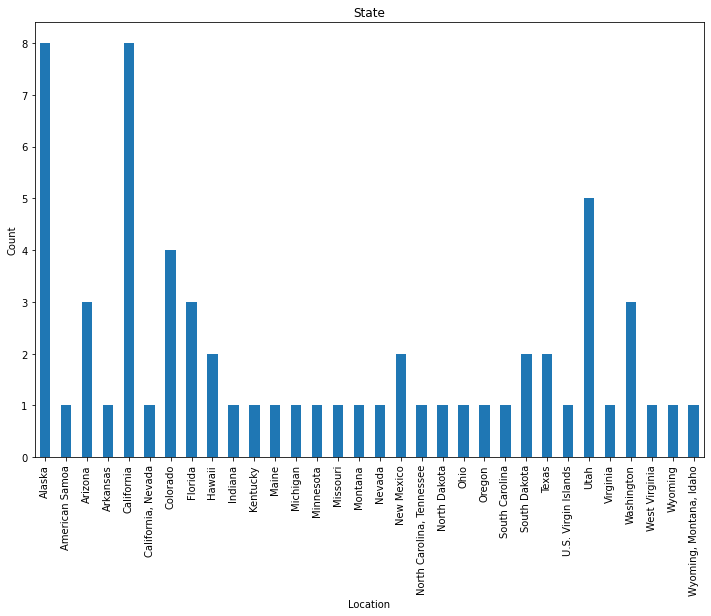

In [28]:
parks_loc.plot(kind='bar', figsize=(12, 8))
plt.title('State')
plt.ylabel('Count')